In [1]:
import pandas as pd
import numpy as np
import tsplib95 as tsp
from tqdm import tqdm
import matplotlib.pyplot as plt

/tmp/ipykernel_10552/3355450346.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
datasets = [
    "/home/staff/Documents/week_4/data/a280.tsp",
    "/home/staff/Documents/week_4/data/ch150.tsp",
    "/home/staff/Documents/week_4/data/d198.tsp",
    "/home/staff/Documents/week_4/data/eil101.tsp",
    "/home/staff/Documents/week_4/data/rd100.tsp"
]

In [3]:
def initialize_tour(df):
    
    num_cities = len(list(df.get_nodes()))
    visited = [False] * num_cities
    tour = [np.random.randint(1, num_cities+1)]
    visited[tour[0]-1] = True
    
    while len(tour) < num_cities:
        current_city = tour[-1]
        nearest_city = None
        nearest_distance  = float('inf')
        
        for city in range(1, num_cities+1):
            if not visited[city-1] and df.get_weight(current_city, city) < nearest_distance:
                nearest_distance = df.get_weight(current_city, city)
                nearest_city = city
        
        tour.append(nearest_city)
        visited[nearest_city-1] = True
        
    return tour

In [4]:
def generate_neighbors(x, n=10):
    neighbors = []
    while len(neighbors) < n:
        i = np.random.randint(0, len(x)-2)
        j = np.random.randint(1, len(x)-1)
        if i > j :
            i, j = j, i
        neighbor = x.copy()
        neighbor[i:j] = neighbor[i:j][::-1]
        if tuple(neighbor) not in map(tuple, neighbors):
            neighbors.append(neighbor)
    return neighbors

In [5]:
def fitness(x, df):
    fitness = 0
    for i in range(len(x)-1):
        fitness += df.get_weight(x[i], x[i+1]) 
    fitness += df.get_weight(x[-1], x[0]) 
    return fitness

def best_neighbor(x:list, df , generate_neighbors:callable = generate_neighbors, fitness: callable = fitness):
    neighbors = generate_neighbors(x)
    best_neighbor = neighbors[0]
    for neighbor in range(1, len(neighbors)):
        if fitness(neighbors[neighbor], df) < fitness(best_neighbor, df):
            best_neighbor = neighbors[neighbor]
    return best_neighbor

def random_neighbor(x:list, paths:np.array, generate_neighbors:callable = generate_neighbors):
    neighbors = generate_neighbors(x)
    return neighbors[np.random.randint(0, len(neighbors))]

In [6]:
def hill_climbing(f:callable, x_init, n_iters:int, df, variant:str, epsilon:float = 0.001, steepest:bool = False):
    x = x_init
    x_best = x
    if variant == "simple":
        neighbor_function = best_neighbor
    elif variant == "stochastic":
        neighbor_function = random_neighbor
    for iter in range(n_iters):
        y = neighbor_function(x, df)
        if f(x, df) > f(y, df) :
            x = y
            if f(x, df) < f(x_best, df):
                x_best = x
            else:
                if steepest:
                    x = x_best
    return x_best
    

In [10]:
iterations = list(range(10, 101, 10))
print(iterations)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


Dataset /home/staff/Documents/week_4/data/a280.tsp
Simple Hill Climbing


,Iterations,Costs
0,100,3245
1,200,3161
2,300,3112
3,400,3102
4,500,3040
5,600,3124
6,700,3127
7,800,3088
8,900,3068
9,1000,3059


Stochastic Hill Climbing


,Iterations,Costs
0,100,3257
1,200,3163
2,300,3171
3,400,3148
4,500,3107
5,600,3209
6,700,3224
7,800,3247
8,900,3234
9,1000,3181


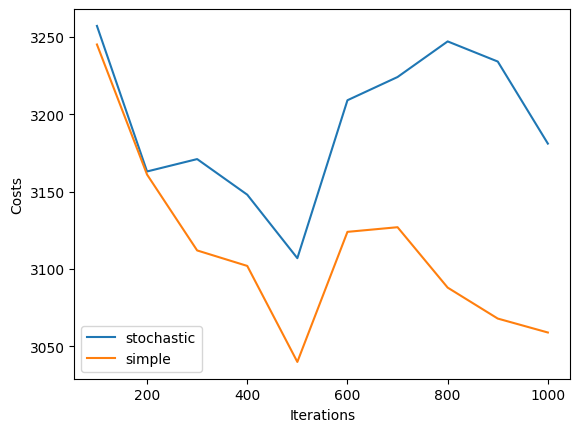

Dataset /home/staff/Documents/week_4/data/ch150.tsp
Simple Hill Climbing


,Iterations,Costs
0,100,7721
1,200,7547
2,300,7085
3,400,7238
4,500,6890
5,600,7086
6,700,7189
7,800,7006
8,900,7294
9,1000,7197


Stochastic Hill Climbing


,Iterations,Costs
0,100,7775
1,200,7787
2,300,7041
3,400,7568
4,500,7184
5,600,7216
6,700,7436
7,800,7649
8,900,7656
9,1000,7486


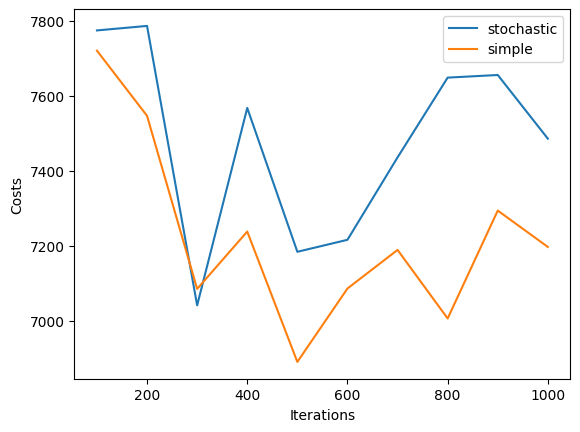

Dataset /home/staff/Documents/week_4/data/d198.tsp
Simple Hill Climbing


,Iterations,Costs
0,100,18807
1,200,18061
2,300,19784
3,400,18645
4,500,18200
5,600,18478
6,700,17436
7,800,17944
8,900,16982
9,1000,18091


Stochastic Hill Climbing


,Iterations,Costs
0,100,18896
1,200,18290
2,300,20540
3,400,18800
4,500,18561
5,600,18716
6,700,17916
7,800,18483
8,900,18215
9,1000,18688


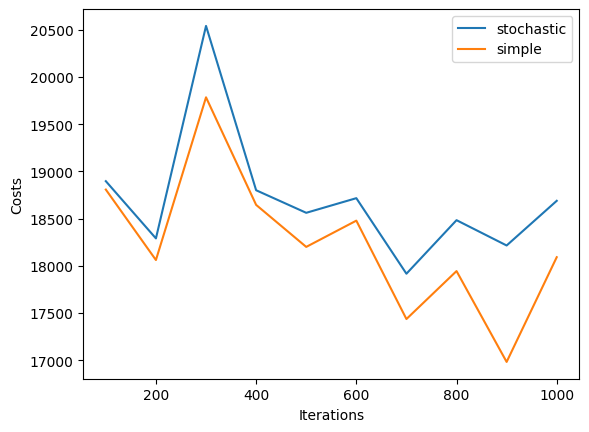

Dataset /home/staff/Documents/week_4/data/eil101.tsp
Simple Hill Climbing


,Iterations,Costs
0,100,831
1,200,805
2,300,738
3,400,763
4,500,779
5,600,717
6,700,716
7,800,739
8,900,697
9,1000,751


Stochastic Hill Climbing


,Iterations,Costs
0,100,843
1,200,839
2,300,778
3,400,827
4,500,853
5,600,805
6,700,763
7,800,815
8,900,752
9,1000,857


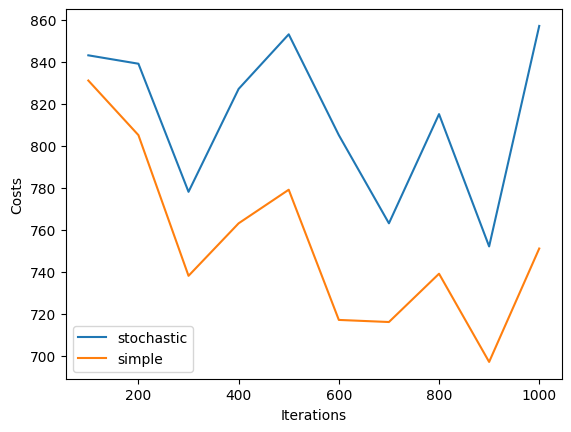

Dataset /home/staff/Documents/week_4/data/rd100.tsp
Simple Hill Climbing


,Iterations,Costs
0,100,9827
1,200,9323
2,300,9144
3,400,8810
4,500,8686
5,600,9110
6,700,9059
7,800,9194
8,900,9179
9,1000,9016


Stochastic Hill Climbing


,Iterations,Costs
0,100,10329
1,200,10112
2,300,9764
3,400,9661
4,500,9900
5,600,10302
6,700,9468
7,800,10288
8,900,9997
9,1000,9312


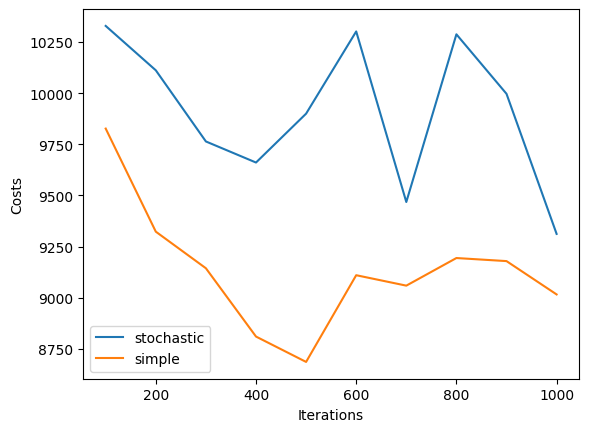

In [21]:

simple_hill_climb_costs= []
stochastic_hill_climb_costs = []
iterations = list(range(100, 1001, 100))

for data in datasets:
    simple_hill_climb_costs= []
    stochastic_hill_climb_costs = []
    for i in range(100, 1001, 100):
        df = tsp.load(data)
        tour = initialize_tour(df)
        best_path = hill_climbing(fitness, tour,  i, df, variant = "simple")
        cost = fitness(best_path, df)
        simple_hill_climb_costs.append(cost)
        best_path = hill_climbing(fitness, tour, i, df, variant = "stochastic")
        cost = fitness(best_path, df)
        stochastic_hill_climb_costs.append(cost)
        label = data + str(iterations)
    plt.plot(iterations, stochastic_hill_climb_costs, label="stochastic")
    plt.plot(iterations, simple_hill_climb_costs,label="simple")
    print("Dataset", data)
    print("Simple Hill Climbing")
    display(pd.DataFrame({"Iterations": iterations, "Costs": simple_hill_climb_costs}))
    print("Stochastic Hill Climbing")
    display(pd.DataFrame({"Iterations": iterations, "Costs": stochastic_hill_climb_costs}))
    plt.legend()
    plt.xlabel("Iterations")
    plt.ylabel("Costs")
    plt.show()
        